# CNN 😎

In [6]:
from preprocessing_utility import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import activations, layers, optimizers, losses, models

In [3]:
train,test=ready_to_be_used_dataset(42,image_squared_size=128, color_mode='rgb')

Found 23404 files belonging to 2 classes.
Using 18724 files for training.
Found 23404 files belonging to 2 classes.
Using 4680 files for validation.


In [4]:
image_batch, labels_batch = next(iter(train))
print(image_batch.shape,labels_batch.shape)

(42, 128, 128, 3) (42,)


#### Model1 definition

https://www.tensorflow.org/tutorials/images/cnn

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 238144)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                15241280  
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                      

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training

In [13]:
history = model.fit(train, epochs=5, 
                    validation_data=test)

Epoch 1/5
446/446 [==============================] - 390s 870ms/step - loss: 0.7495 - accuracy: 0.6198 - val_loss: 0.6247 - val_accuracy: 0.6577
Epoch 2/5
446/446 [==============================] - 369s 827ms/step - loss: 0.5340 - accuracy: 0.7331 - val_loss: 0.5541 - val_accuracy: 0.7182
Epoch 3/5
446/446 [==============================] - 386s 863ms/step - loss: 0.3748 - accuracy: 0.8334 - val_loss: 0.6260 - val_accuracy: 0.7141
Epoch 4/5
446/446 [==============================] - 351s 786ms/step - loss: 0.2023 - accuracy: 0.9199 - val_loss: 0.8696 - val_accuracy: 0.7130
Epoch 5/5
446/446 [==============================] - 1664s 4s/step - loss: 0.0973 - accuracy: 0.9651 - val_loss: 1.1887 - val_accuracy: 0.7038


#### Performance evaluation

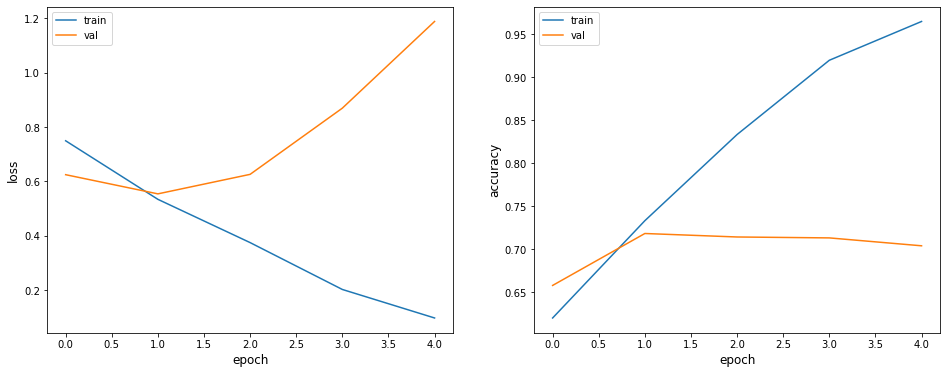

In [14]:
def performance_plot(history):
    plt.figure(figsize=(16, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['train', 'val'], fontsize=10)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['train', 'val'], fontsize=10)

    plt.show()

performance_plot(history)